In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.layers import Conv2D, Flatten, Dense
from keras.models import Sequential
from keras.losses import categorical_crossentropy
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [50]:
((x_train, y_train), (x_test, y_test)) = mnist.load_data()

In [51]:
x_train, y_train, x_test, y_test = x_train.reshape(-1, 28, 28, 1), np.expand_dims(y_train, axis=-1), np.expand_dims(x_test, axis=-1), np.expand_dims(y_test, axis=-1) 

In [52]:
x_train, x_test = x_train/255, x_test/255

In [53]:
ohe = OneHotEncoder(sparse=False)

y_train, y_test = ohe.fit_transform(y_train), ohe.transform(y_test)

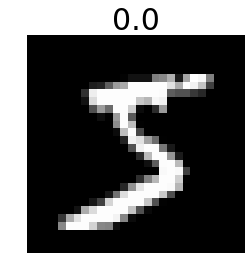

In [54]:
plt.imshow(x_train[0][...,0], cmap="gray")
plt.title(y_train[0][...,0], fontdict={"fontsize":30})
plt.axis("off")
plt.show()

In [55]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, activation="relu", padding="valid", input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", padding="valid"))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", padding="valid"))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", padding="valid"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

In [74]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 32)        18464     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 20, 20, 32)        9248      
_________________________________________________________________
flatten_3 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               6554112   
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [56]:
model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer="sgd")

In [57]:
model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 213s 114ms/step - loss: 0.3031 - acc: 0.9109 - val_loss: 0.1084 - val_acc: 0.9660
Epoch 2/50
  15/1875 [..............................] - ETA: 3:08 - loss: 0.0779 - acc: 0.9792

KeyboardInterrupt: 

In [58]:
out = model.predict(x_train[0:1])

In [59]:
out.shape

(1, 10)

In [60]:
np.argmax(out)

5

In [70]:
conv1 = model.layers[0]

In [71]:
kernels, biases = conv1.get_weights()

In [72]:
kernels.shape, biases.shape

((3, 3, 1, 64), (64,))

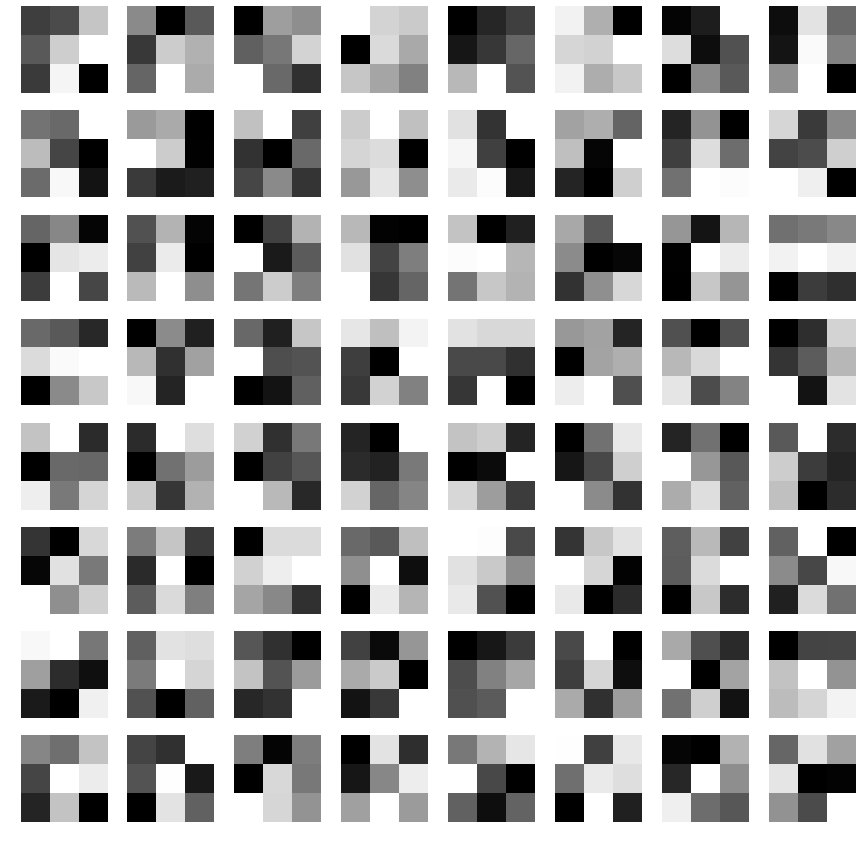

In [73]:
plt.figure(figsize=(15,15))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(kernels[:, :, 0, i], cmap="gray")
    plt.axis("off")
plt.show()